Dataset: Wastewater Treatment Plant Dataset 
The objective is to build a machine learning model that predicts whether the wastewater treatment process is operating optimally based on daily measurements of the plant's operational data.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [8]:
df1 = pd.read_csv("Data-Melbourne_F_fixed.csv")

In [9]:
df1

,S.No,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,5.068,4.716,305938,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56,0.00,10.0,14.4,22.2,2019,6,20
1378,1378,5.882,5.510,293446,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71,0.00,0.0,13.5,25.9,2019,6,24
1379,1379,4.638,4.811,307968,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65,0.00,10.0,18.1,25.9,2019,6,25
1380,1380,5.373,4.929,316675,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65,0.00,10.0,21.9,35.2,2019,6,26


Task :
1.	Data Preprocessing: 
Perform comprehensive data preprocessing, including handling missing values, scaling, and feature selection, while visualizing key trends and correlations to enhance data insights and model performance.

In [10]:
df1.isnull().sum()

S.No                        0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

In [11]:
df1.columns

Index(['S.No', 'Average Outflow', 'Average Inflow', 'Energy Consumption',
       'Ammonia', 'Biological Oxygen Demand', 'Chemical Oxygen Demand',
       'Total Nitrogen', 'Average Temperature', 'Maximum temperature',
       'Minimum temperature', 'Atmospheric pressure', 'Average humidity',
       'Total rainfall', 'Average visibility', 'Average wind speed',
       'Maximum wind speed', 'Year', 'Month', 'Day'],
      dtype='object')

In [12]:
df1.describe()

,S.No,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,690.500000,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,399.093347,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000000,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,345.250000,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,690.500000,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,1035.750000,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,1381.000000,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S.No                      1382 non-null   int64  
 1   Average Outflow           1382 non-null   float64
 2   Average Inflow            1382 non-null   float64
 3   Energy Consumption        1382 non-null   int64  
 4   Ammonia                   1382 non-null   float64
 5   Biological Oxygen Demand  1382 non-null   float64
 6   Chemical Oxygen Demand    1382 non-null   float64
 7   Total Nitrogen            1382 non-null   float64
 8   Average Temperature       1382 non-null   float64
 9   Maximum temperature       1382 non-null   float64
 10  Minimum temperature       1382 non-null   float64
 11  Atmospheric pressure      1382 non-null   float64
 12  Average humidity          1382 non-null   int64  
 13  Total rainfall            1382 non-null   float64
 14  Average 

In [14]:
# Drop irrelevant column - 'S.No'
df2 = df1.drop(columns=['S.No'])

# Check for constant features based on variance
low_variance_features = df2.var()[df2.var() < 0.01].index.tolist()

low_variance_features

[]

In [15]:
# Identify numerical columns to scale (we will exclude temporal datas)
columns_to_scale = df2.columns.difference(['year', 'month', 'day'])

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical data
scaled_df2 = df2.copy()
scaled_df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

# Display the first few rows of the scaled data for verification
scaled_df2.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,-0.805651,-1.332352,-2.225310,-1.575285,-0.198473,-0.797725,-0.661883,0.790009,0.644062,0.550494,-0.060258,-0.520245,0.996525,0.05506,1.039669,1.558983,-1.426683,-1.520674,-1.669058
1,-0.809721,-1.073851,-2.096054,-1.833057,-0.140310,-0.728932,-0.760490,0.382340,0.432622,0.486050,-0.060258,-0.038448,-0.166933,0.05506,-0.712434,-0.652311,-1.426683,-1.520674,-1.554619
2,-0.816234,-0.890398,-1.639084,0.358007,0.418058,-0.068521,0.498985,0.326749,0.940079,-0.265797,-0.060258,-1.139698,0.024425,0.05506,1.740510,2.212906,-1.426683,-1.520674,-1.211301
3,-0.816234,-0.800756,-1.515138,-0.415310,0.557650,0.027789,0.072624,-0.080920,-0.088932,0.228274,-0.060258,-1.002042,-0.166933,0.05506,1.053686,0.302761,-1.426683,-1.520674,-1.096862
4,-0.825189,-0.495001,-1.620977,0.873551,1.464997,1.169751,0.798166,-0.303284,-0.201700,-0.437647,-0.060258,0.099208,-0.166933,0.05506,0.156609,-0.015596,-1.426683,-1.520674,-0.982422


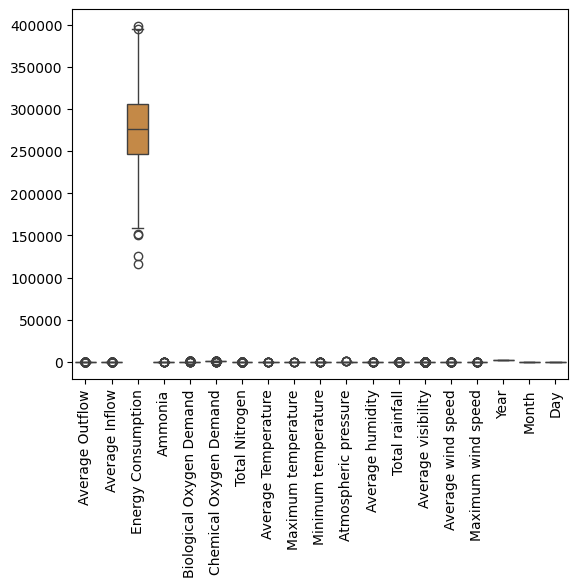

In [16]:
sns.boxplot(df2)
plt.xticks(rotation= 90)
plt.show()

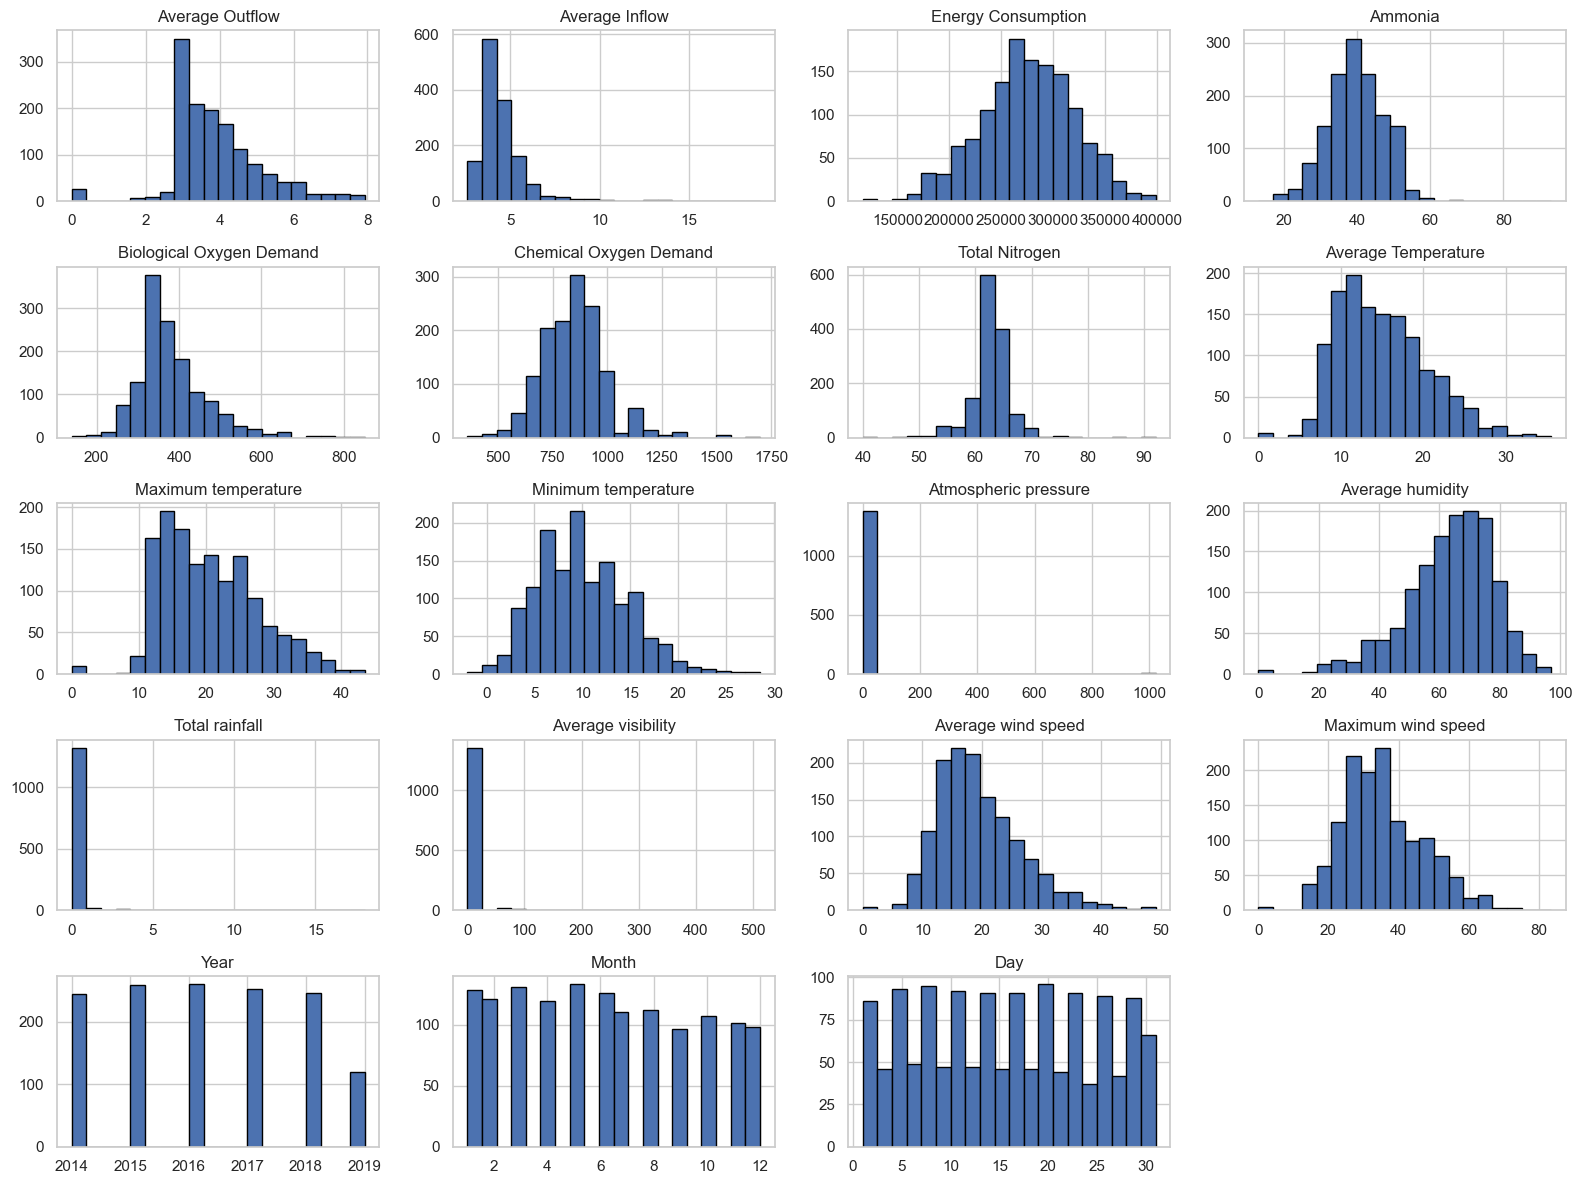

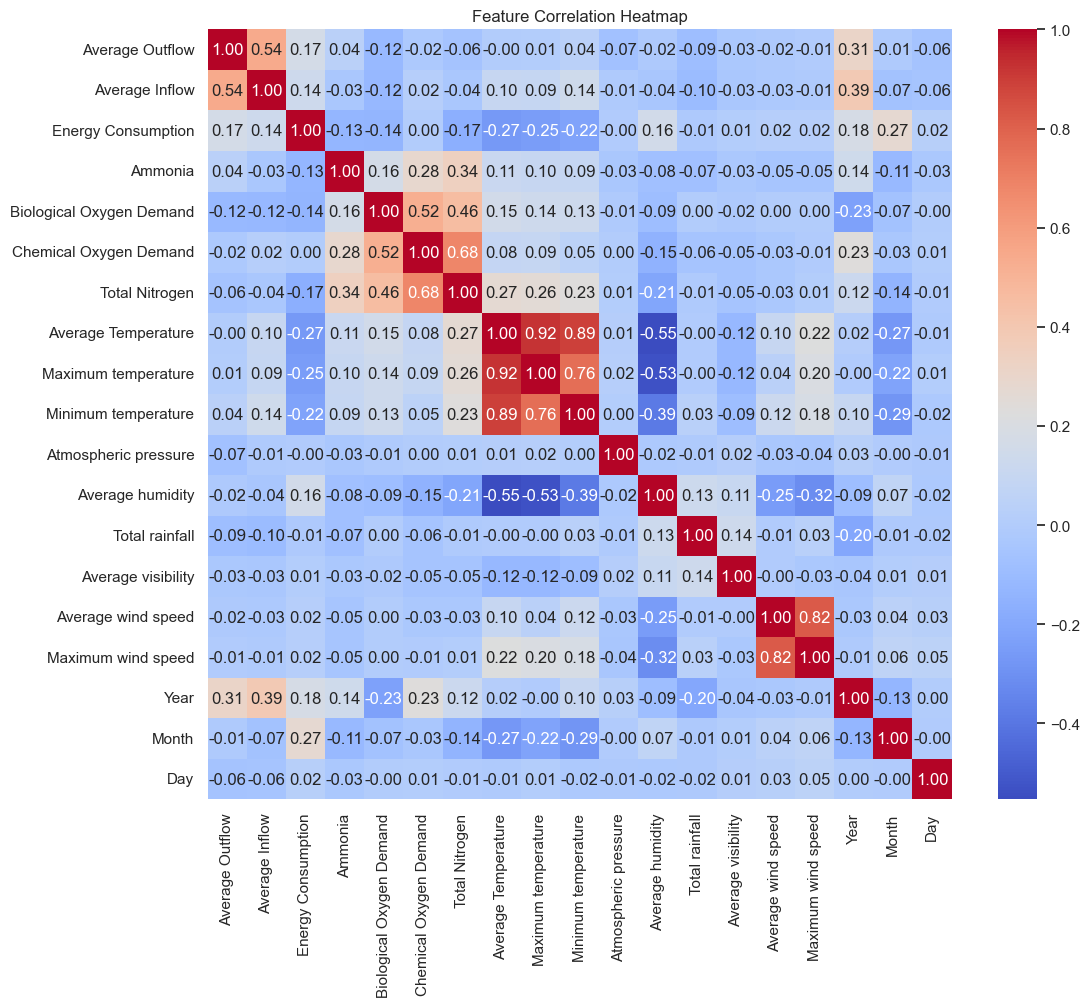

In [17]:
# Setting up the plot style
sns.set(style="whitegrid")

# Plotting histograms.
df2.hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

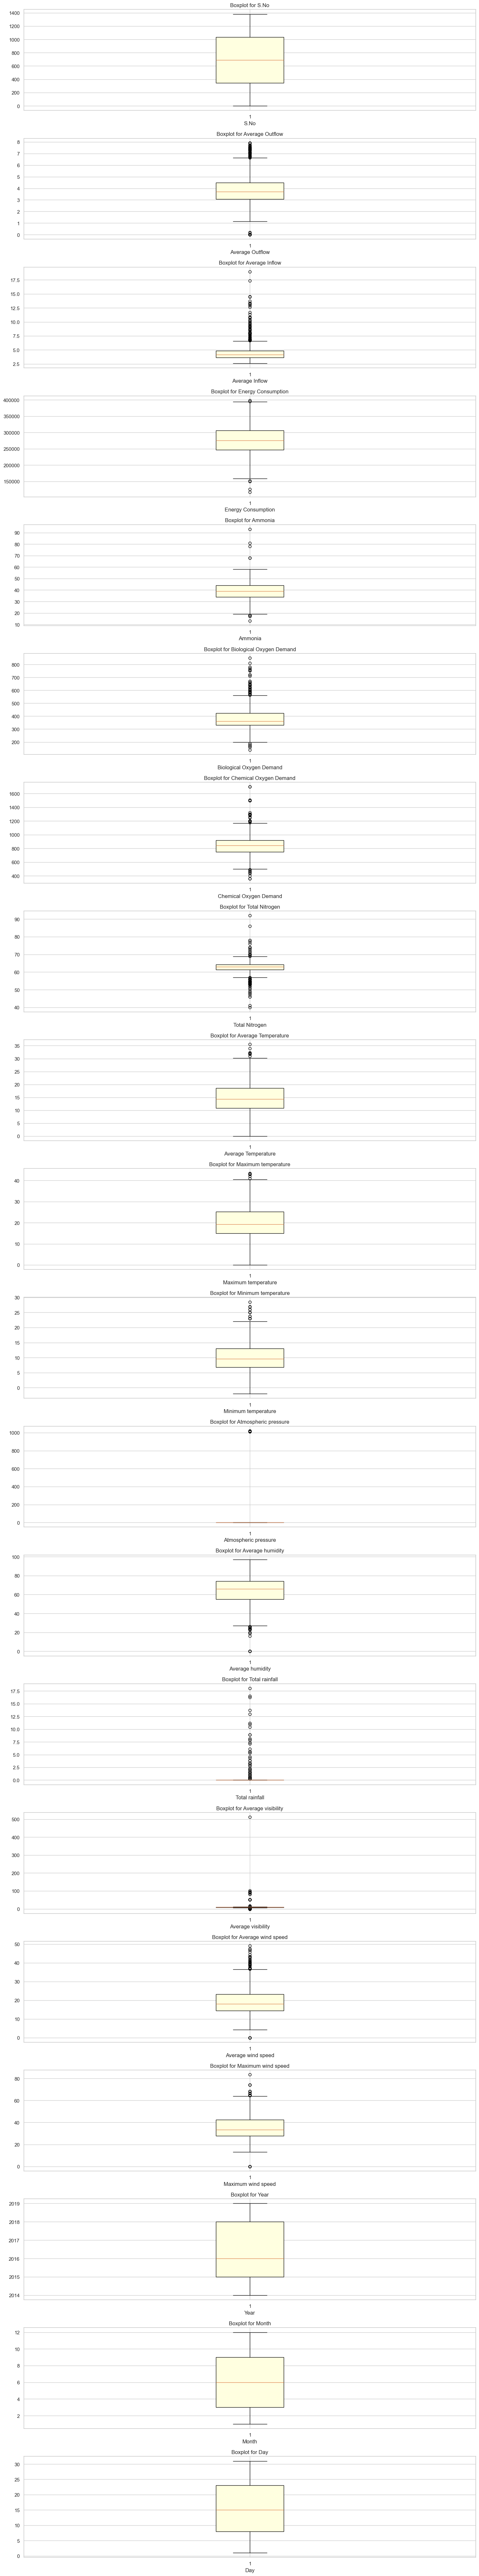

In [18]:
#Checking outliers.
def plot_boxplots(df1):
    numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns
    
    # Plot the boxplots.
    plt.figure(figsize=(15, len(numerical_features) * 4))
    for i, col in enumerate(numerical_features):
        plt.subplot(len(numerical_features), 1, i + 1)
        plt.boxplot(df1[col].dropna(),  patch_artist=True, 
                    boxprops=dict(facecolor='lightyellow'))
        plt.title(f"Boxplot for {col}")
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()
plot_boxplots(df1)

In [19]:
#Selecting target and features.

X = df1.drop(["Energy Consumption"], axis=1)
# converting to binary the target variable
y = (df1["Energy Consumption"] > df1["Energy Consumption"].median()).astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train

,S.No,Average Outflow,Average Inflow,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
482,482,1.927,3.398,50.0,370.0,1100.0,67.264,21.4,32.0,13.0,0.0,44,0.0,10.0,23.9,51.9,2015,11,30
59,59,3.077,3.427,30.0,462.5,925.0,64.411,18.3,24.3,11.9,0.0,66,0.0,10.0,11.7,22.2,2014,3,25
405,405,2.980,3.363,23.0,500.0,1000.0,64.477,8.9,12.0,7.0,0.0,81,0.0,10.0,16.7,24.1,2015,8,12
464,464,2.889,3.279,53.0,495.0,990.0,64.477,20.5,27.0,16.8,0.0,72,0.0,7.7,15.6,29.4,2015,11,4
1303,1303,5.956,5.531,38.0,330.0,820.0,61.396,18.4,26.0,11.0,0.0,69,0.0,10.0,18.0,38.9,2019,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,3.049,3.780,43.0,360.0,880.0,63.949,21.6,28.0,14.0,0.0,35,0.0,0.0,28.2,46.5,2018,4,23
1130,1130,2.987,3.838,34.0,330.0,930.0,63.821,11.3,15.0,7.0,0.0,73,0.0,10.0,21.7,38.9,2018,6,12
1294,1294,4.528,4.638,38.0,380.0,940.0,70.000,16.4,23.0,11.0,0.0,63,0.0,10.0,16.1,27.8,2019,2,20
860,860,6.207,4.209,50.0,470.0,990.0,65.114,13.4,17.0,11.7,0.0,67,0.0,10.0,16.5,33.5,2017,5,24


In [21]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [22]:
# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[-0.51764519, -1.62235532, -0.75524773, ..., -0.78480979,
         1.3852127 ,  1.68996491],
       [-1.55597409, -0.70137615, -0.73549057, ..., -1.40382371,
        -0.9198003 ,  1.1144627 ],
       [-0.70665542, -0.77905874, -0.77909257, ..., -0.78480979,
         0.52083282, -0.38184304],
       ...,
       [ 1.47555355,  0.46065931,  0.08954092, ...,  1.69124589,
        -1.20792693,  0.5389605 ],
       [ 0.41022319,  1.8052889 , -0.2027287 , ...,  0.45321805,
        -0.34354705,  0.99936226],
       [ 1.0631676 ,  0.18356471, -0.37441156, ...,  1.07223197,
        -0.05542043, -1.07244569]])

In [24]:
# Logistic Regression from scratch.
class LogitRegression() : 
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None 

    # Function for model training     
    def fit( self, X, Y ) :         
        # no_of_training_examples, no_of_features         
        self.m, self.n = X.shape         
        # weight initialization         
        self.W = np.zeros( self.n )         
        self.b = 0        
        self.X = X         
        self.Y = Y 

        # gradient descent learning 
        for i in range( self.epochs ) :             
            self.update_weights()             
        return self

        # Helper function to update weights in gradient descent 
    def update_weights( self ) :            
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) ) 
        # calculate gradients         
        tmp = ( A - self.Y.T )         
        tmp = np.reshape( tmp, self.m )         
        dW = np.dot( self.X.T, tmp ) / self.m          
        db = np.sum( tmp ) / self.m  
     
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db 
          
        return self

        # Hypothetical function  h( x )  
    def predict( self, X ) :     
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )         
        Y = np.where( Z > 0.5, 1, 0 )         
        return Y 

In [36]:
 # Model training     
model1 = LogitRegression( learning_rate = 0.01, epochs = 1000 ) 
      
model1.fit( X_train, y_train )         

 # Prediction on test set 
y_pred = model1.predict( X_test )     

# measure performance     
correctly_classified = 0    
      
# counter     
count = 0    
for count in range(np.size(y_pred)) :   
        if y_test[count] == y_pred[count] :             
           correctly_classified = correctly_classified + 1
acc1 = (correctly_classified / count )
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Logistic Regression From Scratch - ")
print( "Accuracy on test set by our model : ",(correctly_classified / count )) 
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Logistic Regression From Scratch - 
Accuracy on test set by our model :  0.6811594202898551
F1-Score: 0.6810551558752997
Confusion Matrix:
 [[140  62]
 [ 71 142]]


In [37]:
# Logistic Regression using sklearn

model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred)

print("Logistic regression from sklearn - ")
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred2))
print("F1-Score:", f1)
print('Confusion Matrix : \n ', confusion_matrix(y_test, y_pred2))

Logistic regression from sklearn - 
Logistic Regression Accuracy: 0.6506024096385542
F1-Score: 0.6810551558752997
Confusion Matrix : 
  [[134  68]
 [ 77 136]]


In [38]:
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train, y_train)
y_pred_KNN = model3.predict(X_test)
acc3 = accuracy_score(y_test, y_pred_KNN)
print(f"Accuracy: {accuracy_score(y_test, y_pred_KNN):}")
print(f"F1 Score: {f1_score(y_test, y_pred_KNN, average='binary'):}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_KNN)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_KNN)}")

Accuracy: 0.6674698795180722
F1 Score: 0.6834862385321101
Confusion Matrix:
[[128  74]
 [ 64 149]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       202
           1       0.67      0.70      0.68       213

    accuracy                           0.67       415
   macro avg       0.67      0.67      0.67       415
weighted avg       0.67      0.67      0.67       415



In [39]:
model4 = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
model4.fit(X_train, y_train)
y_pred_DTC = model4.predict(X_test)
acc4= accuracy_score(y_test, y_pred_DTC)

print(f"Accuracy: {accuracy_score(y_test, y_pred_DTC):}")
print(f"F1 Score: {f1_score(y_test, y_pred_DTC, average='binary'):}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_DTC)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_DTC)}")

Accuracy: 0.6867469879518072
F1 Score: 0.656084656084656
Confusion Matrix:
[[161  41]
 [ 89 124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       202
           1       0.75      0.58      0.66       213

    accuracy                           0.69       415
   macro avg       0.70      0.69      0.68       415
weighted avg       0.70      0.69      0.68       415



In [40]:
model5 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model5.fit(X_train, y_train)
y_preds_RFC = model5.predict(X_test)
acc5 = accuracy_score(y_test, y_preds_RFC)

print(f"Accuracy: {accuracy_score(y_test, y_preds_RFC):}")
print(f"F1 Score: {f1_score(y_test, y_preds_RFC, average='binary'):}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_preds_RFC)}")
print(f"Classification Report:\n{classification_report(y_test, y_preds_RFC)}")

Accuracy: 0.7349397590361446
F1 Score: 0.7429906542056075
Confusion Matrix:
[[146  56]
 [ 54 159]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       202
           1       0.74      0.75      0.74       213

    accuracy                           0.73       415
   macro avg       0.73      0.73      0.73       415
weighted avg       0.73      0.73      0.73       415



In [41]:
model6 = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
model6.fit(X_train, y_train)
y_preds_SVC = model6.predict(X_test)
acc6 = accuracy_score(y_test, y_preds_SVC)

print(f"Accuracy: {accuracy_score(y_test, y_preds_SVC):}")
print(f"F1 Score: {f1_score(y_test, y_preds_SVC, average='binary'):}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_preds_SVC)}")
print(f"Classification Report:\n{classification_report(y_test, y_preds_SVC)}")

Accuracy: 0.7012048192771084
F1 Score: 0.7116279069767442
Confusion Matrix:
[[138  64]
 [ 60 153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       202
           1       0.71      0.72      0.71       213

    accuracy                           0.70       415
   macro avg       0.70      0.70      0.70       415
weighted avg       0.70      0.70      0.70       415



In [47]:
print("Accuracy of different models are - ")
print("Logistic Regression from scratch : ",acc1)
print("Logistic Regression using sklearn : ",acc2)
print("KNN : ",acc3)
print("Decision Tree : ",acc4)
print("Random Forest : ",acc5)
print("SVC : ",acc6)

Accuracy of different models are - 
Logistic Regression from scratch :  0.6811594202898551
Logistic Regression using sklearn :  0.6506024096385542
KNN :  0.6674698795180722
Decision Tree :  0.6867469879518072
Random Forest :  0.7349397590361446
SVC :  0.7012048192771084


Performing hyperparameter tuning to optimize performance on the test dataset.

In [31]:
#Hyperparameter Tuning
# Parameter on Logistic Regression
param_dist = {
    'C': uniform(loc=0.1, scale=10),  # Randomly sample values for C from 0.1 to 10
    'penalty': ['l2', 'l1', 'elasticnet'],  # Penalties
    'solver': ['lbfgs', 'saga'],  # Solvers
    'max_iter': [1000, 2000, 3000]  # Increase max_iter to avoid convergence issues
}

# Logistic Regression model
logistic_model = LogisticRegression()

# RandomizedSearchCV setup
random_search_lr = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_lr.fit(X_train, y_train)

# Best parameters and accuracy
print("Logistic Regression Best Parameters:", random_search_lr.best_params_)
print("Logistic Regression Best Accuracy:", random_search_lr.best_score_)

Logistic Regression Best Parameters: {'C': np.float64(0.16952130531190704), 'max_iter': 3000, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Best Accuracy: 0.6338870786816944


In [32]:
# Define the parameter grid for kNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier()

# Set up the GridSearchCV with the defined parameter grid
search_knn = GridSearchCV(knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy')

# Fit the model using the training data
search_knn.fit(X_train, y_train)

# Output the best parameters and cross-validation score
best_params = search_knn.best_params_
best_cv_score = search_knn.best_score_

print(f"Best Parameters for K-Nearest Neighbors: {best_params}")
print(f"Best Cross-Validation Accuracy for KNN: {best_cv_score:.4f}")


Best Parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Cross-Validation Accuracy for KNN: 0.7032


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the Decision Tree
dt_hyperparameters = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV with the parameter grid
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=dt_hyperparameters, cv=5, scoring='accuracy')

# Fit the model using the training data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and cross-validation score
best_parameters = grid_search_dt.best_params_
best_cv_score = grid_search_dt.best_score_

# Print the results
print(f"Best Parameters for Decision Tree: {best_parameters}")
print(f"Best Cross-Validation Accuracy for Decision Tree: {best_cv_score:.4f}")


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Accuracy for Decision Tree: 0.6566


In [34]:
# Define the parameter grid for the Random Forest
rf_hyperparameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with the parameter grid
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=rf_hyperparameters, cv=5, scoring='accuracy')

# Fit the model using the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and cross-validation score
best_rf_parameters = grid_search_rf.best_params_
best_rf_cv_score = grid_search_rf.best_score_

# Print the results
print(f"Best Parameters for Random Forest: {best_rf_parameters}")
print(f"Best Cross-Validation Accuracy for Random Forest: {best_rf_cv_score:.4f}")


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy for Random Forest: 0.7363


In [35]:
# Define the parameter grid for SVM
svm_hyperparameters = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel function to use
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [3, 4]  # Degree of the polynomial kernel (if kernel='poly')
}

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Set up GridSearchCV with the parameter grid
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=svm_hyperparameters, cv=5, scoring='accuracy')

# Fit the model using the training data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and cross-validation score
best_svm_parameters = grid_search_svm.best_params_
best_svm_cv_score = grid_search_svm.best_score_

# Print the results
print(f"Best Parameters for SVM: {best_svm_parameters}")
print(f"Best Cross-Validation Accuracy for SVM: {best_svm_cv_score:.4f}")


Best Parameters for SVM: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy for SVM: 0.6711
